In [26]:
import os
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [27]:
directory=os.listdir('AudioWAV/')
print(len(directory))

7442


In [28]:
emotion= []
path= []
for audio_file in directory:
    if "ANG" in audio_file:
        emotion.append("Angry")
        path.append("AudioWAV/"+str(audio_file))
    if "HAP" in audio_file:
        emotion.append("Happy")
        path.append("AudioWAV/"+str(audio_file))
    if "SAD" in audio_file:
        emotion.append("Sad")
        path.append("AudioWAV/"+str(audio_file))
    if "FEA" in audio_file:
        emotion.append("Fear")
        path.append("AudioWAV/"+str(audio_file))
    if "DIS" in audio_file:
        emotion.append("Disgust")
        path.append("AudioWAV/"+str(audio_file))

In [29]:
df = pd.DataFrame({
    'Emotion': emotion,
    'Path': path
})


In [30]:
df["Emotion"].unique()

array(['Angry', 'Disgust', 'Fear', 'Happy', 'Sad'], dtype=object)

In [31]:
file='AudioWAV/1007_DFA_DIS_XX.wav'

In [32]:
audio, sampling_rate = librosa.load(file)
print(audio)
print(sampling_rate)

[ 0.00599887  0.00653347  0.00506197 ... -0.00017508 -0.00013229
  0.        ]
22050


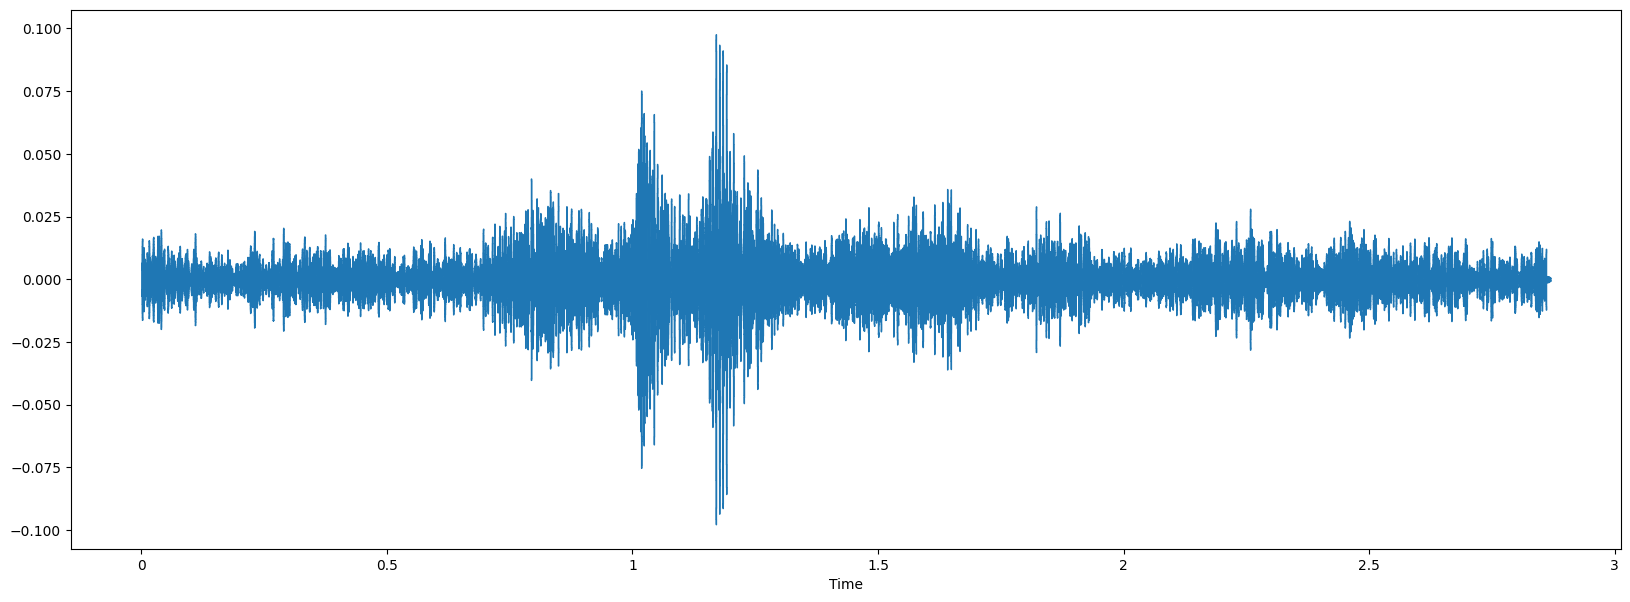

In [33]:
plt.figure(figsize=(20, 7))
librosa.display.waveshow(audio, sr=sampling_rate)

In [34]:
def feature_MFCC_Delta(file_path):
    audio_file=file_path
    audio, sample_rate=librosa.load(audio_file)
    mfcc = librosa.feature.mfcc(y=audio, sr=44100,n_mfcc=30,n_fft = 2048)
    delta_mfcc = librosa.feature.delta(mfcc)
    mfcc_delta = np.concatenate((mfcc, delta_mfcc), axis=0)
    mfcc_delta_list = zip(*mfcc_delta)
    averages = [sum(sublist)/len(sublist) for sublist in mfcc_delta_list]
    return averages,mfcc,mfcc_delta
feature_MFCC_Delta(file)

([-4.522652709856629,
  -3.6721376025428376,
  -3.8117963049560784,
  -4.18745392896235,
  -3.6973293218761683,
  -4.170580627396703,
  -4.511812063422985,
  -4.101486623488987,
  -4.354975777709236,
  -4.047257178823929,
  -3.715575566103022,
  -4.2423546054555725,
  -4.19560407975999,
  -4.363621583026058,
  -4.277990434132517,
  -4.591938370466233,
  -4.570875659460823,
  -4.16066741643784,
  -3.835662692474822,
  -3.783557895074288,
  -3.515290853974875,
  -4.062937563756714,
  -4.715026553270096,
  -5.297408247118195,
  -5.42805328986918,
  -4.7456926497320335,
  -4.491117301707466,
  -4.067843700479716,
  -3.4226742058992388,
  -3.269632494884233,
  -3.7745682508684695,
  -3.567385832220316,
  -3.7706437996899087,
  -3.2340951240078235,
  -3.146204787741105,
  -3.6383466997804743,
  -3.4971690845986205,
  -3.7472826686998206,
  -3.9214111902130147,
  -3.4041385531425474,
  -3.7570797024915614,
  -4.121007242053747,
  -3.723341388658931,
  -3.788750444352627,
  -3.4318401290724676

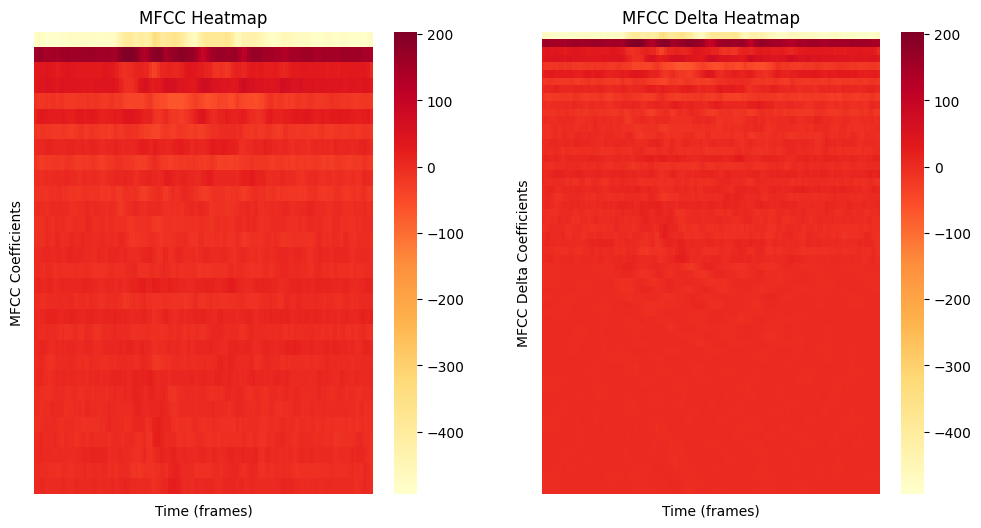

In [35]:
average_matrix,mfcc_matrix, mfcc_delta_matrix = feature_MFCC_Delta(file)
mfcc_df = pd.DataFrame(mfcc_matrix)
mfcc_delta_df = pd.DataFrame(mfcc_delta_matrix)

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
sns.heatmap(mfcc_df, cmap='YlOrRd', xticklabels=False, yticklabels=False, ax=axs[0])
axs[0].set_title('MFCC Heatmap')
axs[0].set_xlabel('Time (frames)')
axs[0].set_ylabel('MFCC Coefficients')
sns.heatmap(mfcc_delta_df, cmap='YlOrRd', xticklabels=False, yticklabels=False, ax=axs[1])
axs[1].set_title('MFCC Delta Heatmap')
axs[1].set_xlabel('Time (frames)')
axs[1].set_ylabel('MFCC Delta Coefficients')
plt.show()

In [36]:
def feature_spectral_contrast(file_path):
    audio_file=file_path
    audio, sample_rate=librosa.load(audio_file)
    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=44100,n_fft = 2048)
    spectral_contrast_list = zip(*spectral_contrast)
    averages = [sum(sublist)/len(sublist) for sublist in spectral_contrast_list]
    return averages
feature_spectral_contrast(file)

[11.247836690242211,
 14.353837779030325,
 20.558099628710718,
 20.310159849532567,
 19.979623258516053,
 20.580417217510128,
 19.14170170345273,
 19.44794746716081,
 17.84712098973373,
 19.92433973528286,
 20.52735523057672,
 21.545713410721664,
 19.695487675715807,
 20.015091990506953,
 20.259402623760064,
 20.343561222290468,
 22.169286188946213,
 21.99761054347826,
 19.33867704349117,
 18.78503013412567,
 19.517496322825625,
 19.965294350866607,
 18.87684136804329,
 18.724089636971932,
 21.711838097991315,
 21.833896372620465,
 19.544387381853692,
 20.34035966329922,
 19.715086125246838,
 20.335283367621006,
 20.52506787433877,
 19.97485122679522,
 19.946979534055224,
 21.07490355546388,
 21.556375245675003,
 21.717217880261654,
 24.309082580856956,
 23.392807230818786,
 22.93658408408414,
 23.404044708651092,
 23.02180099580737,
 20.024583171703473,
 22.11662311694928,
 25.297776374834854,
 23.59181611616341,
 23.072959924756102,
 23.353542844309953,
 23.088109549846674,
 23.37130

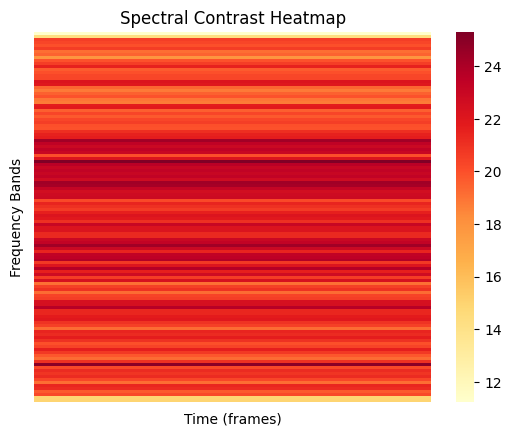

In [37]:
spectral_contrast_matrix = feature_spectral_contrast(file)
spec_df = pd.DataFrame(spectral_contrast_matrix)

sns.heatmap(spec_df, cmap='YlOrRd', xticklabels=False, yticklabels=False)
plt.title('Spectral Contrast Heatmap')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency Bands')
plt.show()

In [38]:
def feature_concat(file):
    mfcc_delta=feature_MFCC_Delta(file)[0]
    #zero_crossing=feature_zero_crossing(file)
    #chroma=feature_chroma(file)
    spectral_contrast=feature_spectral_contrast(file)
    #mel_spectpgraph=feature_mel_spectograph(file)
    #features = np.concatenate((mfcc_delta, spectral_contrast, chroma, zero_crossing,mel_spectpgraph), axis=0)
    features = np.concatenate((mfcc_delta,spectral_contrast), axis=0)
    return features
    
feature_concat(file)

array([-4.52265271, -3.6721376 , -3.8117963 , -4.18745393, -3.69732932,
       -4.17058063, -4.51181206, -4.10148662, -4.35497578, -4.04725718,
       -3.71557557, -4.24235461, -4.19560408, -4.36362158, -4.27799043,
       -4.59193837, -4.57087566, -4.16066742, -3.83566269, -3.7835579 ,
       -3.51529085, -4.06293756, -4.71502655, -5.29740825, -5.42805329,
       -4.74569265, -4.4911173 , -4.0678437 , -3.42267421, -3.26963249,
       -3.77456825, -3.56738583, -3.7706438 , -3.23409512, -3.14620479,
       -3.6383467 , -3.49716908, -3.74728267, -3.92141119, -3.40413855,
       -3.7570797 , -4.12100724, -3.72334139, -3.78875044, -3.43184013,
       -3.99435291, -3.69485945, -3.26053148, -3.48570069, -3.77547102,
       -3.76669316, -3.92305518, -3.76277652, -3.98169898, -4.35212729,
       -4.60353157, -4.61000366, -5.20771931, -4.75712744, -4.73351334,
       -4.67039815, -3.74863948, -3.66700391, -3.54061203, -3.43060341,
       -3.4457189 , -3.83832422, -3.58546902, -3.3505772 , -3.25

In [39]:
print(len(directory))  

7442


In [40]:
feature=[]
for data in directory:
    if "NEU" in data:
        continue
    else:
        data="AudioWAV/"+str(data)
        f=feature_concat(data)
        feature.append(f)


In [41]:
df = pd.DataFrame({'Emotion': emotion,
                   'Path': path})

In [42]:
feature_df=pd.DataFrame({"Feature":feature})

In [43]:
df.head()

,Emotion,Path
0,Angry,AudioWAV/1001_DFA_ANG_XX.wav
1,Disgust,AudioWAV/1001_DFA_DIS_XX.wav
2,Fear,AudioWAV/1001_DFA_FEA_XX.wav
3,Happy,AudioWAV/1001_DFA_HAP_XX.wav
4,Sad,AudioWAV/1001_DFA_SAD_XX.wav


In [44]:
feature_df.head()

,Feature
0,"[-10.380790142544235, -8.481638709331552, -7.8..."
1,"[-7.071232601317266, -6.298779862187803, -6.12..."
2,"[-6.859945512625078, -7.00379490274936, -7.288..."
3,"[-6.56919194238532, -7.128181307287499, -7.901..."
4,"[-7.494229274181028, -6.547672279365361, -6.67..."


In [45]:
df = pd.concat([df,pd.DataFrame(feature_df['Feature'].values.tolist())],axis=1)

In [46]:
df.head()

,Emotion,Path,0,1,2,3,4,5,6,7,...,422,423,424,425,426,427,428,429,430,431
0,Angry,AudioWAV/1001_DFA_ANG_XX.wav,-10.380790,-8.481639,-7.820174,-6.929501,-6.859270,-6.714437,-7.066939,-7.907497,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Disgust,AudioWAV/1001_DFA_DIS_XX.wav,-7.071233,-6.298780,-6.121634,-6.196293,-6.353785,-7.292990,-6.686255,-6.957871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fear,AudioWAV/1001_DFA_FEA_XX.wav,-6.859946,-7.003795,-7.288561,-7.314611,-7.067922,-7.090657,-7.306166,-6.765004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Happy,AudioWAV/1001_DFA_HAP_XX.wav,-6.569192,-7.128181,-7.901692,-7.403987,-6.426532,-6.760340,-7.190763,-7.073341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sad,AudioWAV/1001_DFA_SAD_XX.wav,-7.494229,-6.547672,-6.670542,-7.304177,-7.315307,-7.566334,-6.969357,-7.131951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df = df.fillna(0)

In [48]:
df.head()

,Emotion,Path,0,1,2,3,4,5,6,7,...,422,423,424,425,426,427,428,429,430,431
0,Angry,AudioWAV/1001_DFA_ANG_XX.wav,-10.380790,-8.481639,-7.820174,-6.929501,-6.859270,-6.714437,-7.066939,-7.907497,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Disgust,AudioWAV/1001_DFA_DIS_XX.wav,-7.071233,-6.298780,-6.121634,-6.196293,-6.353785,-7.292990,-6.686255,-6.957871,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fear,AudioWAV/1001_DFA_FEA_XX.wav,-6.859946,-7.003795,-7.288561,-7.314611,-7.067922,-7.090657,-7.306166,-6.765004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Happy,AudioWAV/1001_DFA_HAP_XX.wav,-6.569192,-7.128181,-7.901692,-7.403987,-6.426532,-6.760340,-7.190763,-7.073341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Sad,AudioWAV/1001_DFA_SAD_XX.wav,-7.494229,-6.547672,-6.670542,-7.304177,-7.315307,-7.566334,-6.969357,-7.131951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
